In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load in data
df = pd.read_csv('../Data/train.csv')

In [3]:
# Define x and y
x = df[['GrLivArea','GarageArea','FullBath','YearBuilt','Neighborhood']]
df['LogSalePrice'] = np.log(df['SalePrice'])
y = df['LogSalePrice']

In [4]:
# Build the model
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
column_trans = make_column_transformer((OneHotEncoder(), ['Neighborhood']), remainder = 'passthrough')
linreg = LinearRegression()
ml = make_pipeline(column_trans, linreg)
ml.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Neighborhood'])])),
                ('linearregression', LinearRegression())])

In [5]:
# Predict the test set results
y_pred = ml.predict(x_test)

In [6]:
# Evaluate the model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7552303530305675

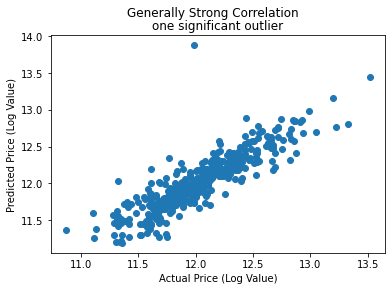

In [7]:
# Plot the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price (Log Value)')
plt.ylabel('Predicted Price (Log Value)')
plt.suptitle('Generally Strong Correlation')
plt.title('one significant outlier')
plt.show()